In [35]:
import numpy as np
import pandas as pd
import heapq
from scipy import stats
import matplotlib.pyplot as plt

transactions = pd.read_csv("C:/Users/darli/Desktop/527/group project/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
articles = pd.read_csv("C:/Users/darli/Desktop/527/group project/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("C:/Users/darli/Desktop/527/group project/h-and-m-personalized-fashion-recommendations/customers.csv")

In [44]:
print(articles.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


DescribeResult(nobs=31788324, minmax=(0.1694915254237288, 5915.254237288135), mean=278.2927385699378, variance=36791.567345439216, skewness=3.110518134362851, kurtosis=25.681142797566817)


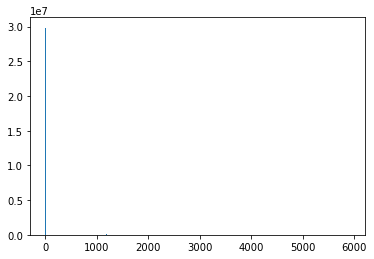

In [38]:
print(stats.describe(transactions['price']*1e+04))
plt.hist(transactions['price']*1e+04,width=10)
plt.show()

In [49]:
print(articles.isnull().sum())
print(articles.head(5))

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64
   article_id  product_code          prod_name  product_type_no  \
0   108775015       

In [53]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

#Conversion of texts to Vector Space Model ---tfidfVectorizer

tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = tfidf_vectorizer.fit_transform(articles["detail_desc"][0:5])

print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())


train_vectors = tfidf_vectorizer.fit_transform(articles["prod_name"])
print(train_vectors)

(1, 34)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.49844628 0.         0.         0.
  0.35464863 0.         0.         0.         0.         0.
  0.35464863 0.35464863 0.         0.         0.         0.49844628
  0.         0.         0.35464863 0.        ]]
  (0, 11821)	0.5486734273232609
  (0, 11110)	0.8360367636350368
  (1, 11821)	0.5486734273232609
  (1, 11110)	0.8360367636350368
  (2, 11821)	0.5486734273232609
  (2, 11110)	0.8360367636350368
  (3, 5405)	0.6800936150862582
  (3, 10457)	0.3644738076905591
  (3, 8403)	0.6361065305642207
  (4, 5405)	0.6800936150862582
  (4, 10457)	0.3644738076905591
  (4, 8403)	0.6361065305642207
  (5, 5405)	0.6800936150862582
  (5, 10457)	0.3644738076905591
  (5, 8403)	0.6361065305642207
  (6, 11091)	0.5854468761091439
  (6, 25)	0.3959896873482508
  (6, 3174)	0.4657416049561216
  (6, 28)	0.532474300019048
  (7, 11091)	0.5854468761091439
  (7, 25)	